In [1]:
%%html
<link rel="stylesheet" type="text/css" href="css/rise.css" />

# Cross Validation

- *Train/Test split*
- Cross validation

### Learning goals - *Train/Test split*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will go through an example illustrating how a model's error differs between training and testing data sets.</div> | `train_test_split` |

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['lines.markersize'] = 10
plt.rcParams['figure.figsize'] = [8, 6]

Fit the following $x$ vs. $y$ data with a series of polynomial models from degree 0 to 5.

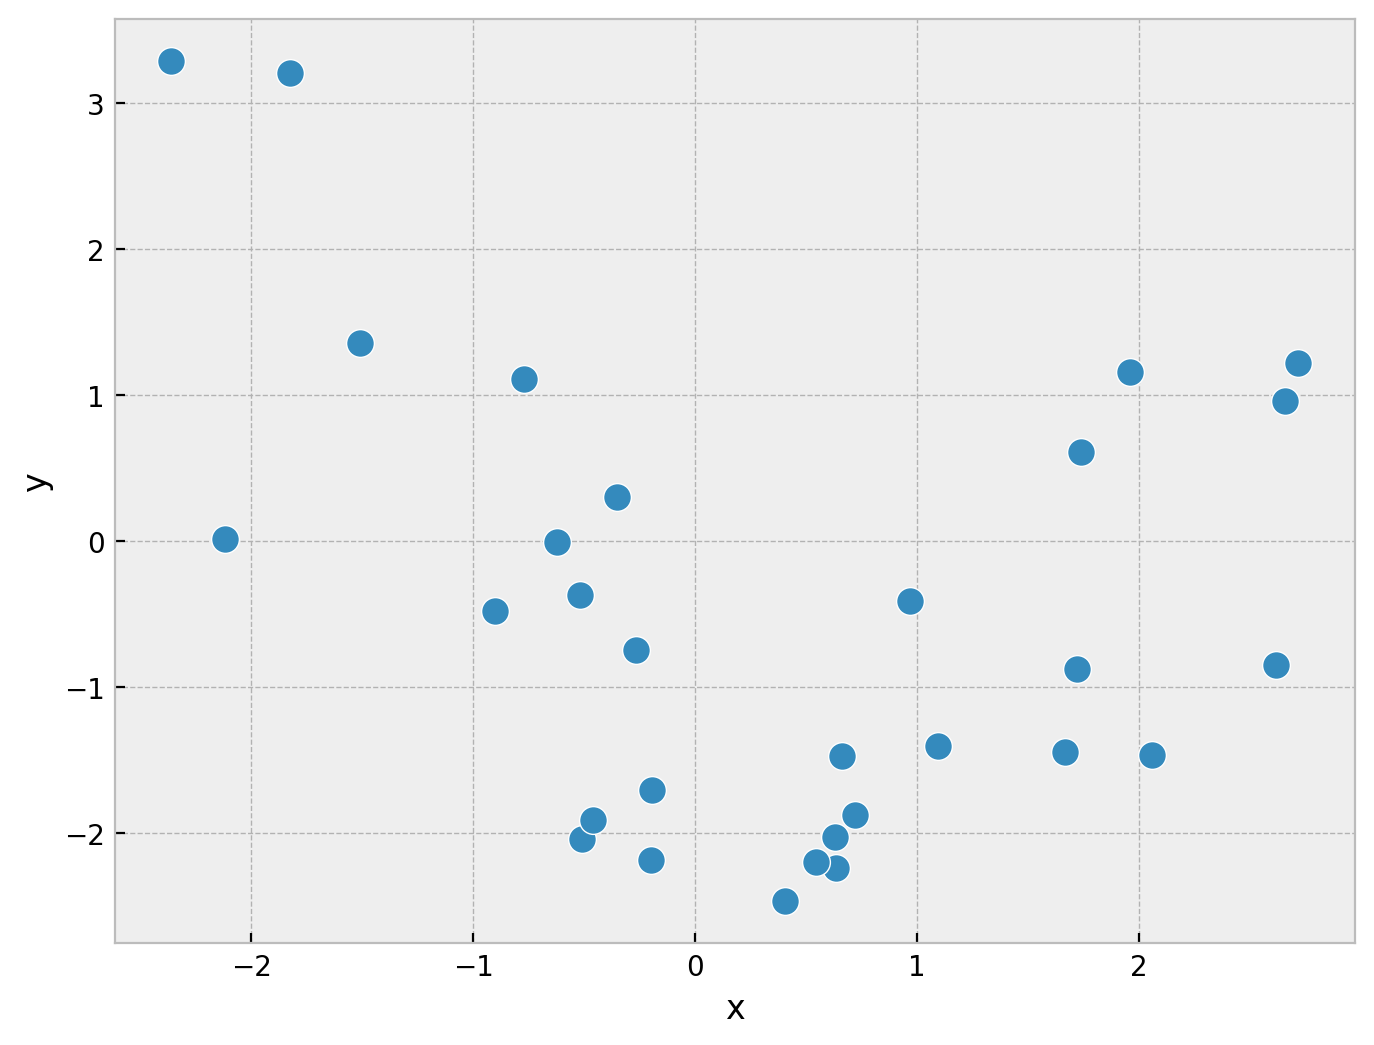

In [3]:
# data
x = np.array([-1.51194917, -0.35259945, -0.62124083, -0.77317774,  1.72056723,
       -0.50984698, -0.20047849,  0.66310664, -0.5212926 ,  2.71761964,
        1.9592446 ,  0.62961848, -2.36181885,  0.96958729, -0.46035628,
        0.40432464, -0.26511359,  1.73803833, -0.19599021,  0.63550634,
       -0.90180419, -2.12003443, -1.82638057,  0.54310286,  2.61477581,
        1.09420987,  2.65622622,  2.05776625,  0.71981851,  1.66798961])
y = np.array([ 1.3602055 ,  0.30283751, -0.00732623,  1.10948672, -0.87715488,
       -2.04098251, -2.18897935, -1.47098137, -0.36907908,  1.21921831,
        1.15865001, -2.03247401,  3.28957677, -0.41322767, -1.90914743,
       -2.46896089, -0.74630152,  0.61039472, -1.70399713, -2.24478022,
       -0.47809011,  0.01491892,  3.20748631, -2.20110028, -0.85001201,
       -1.40306547,  0.95984563, -1.46952705, -1.88071034, -1.44336616])
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y');

# Exercise

Fit the above $x$ vs. $y$ data with a series of polynomial models from degree 0 to 5.

In [ ]:
# polynomial models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

models = []
Xpolys = []
for degree in range(6):
    # prepare the data
    lin2poly = PolynomialFeatures(degree=degree)
    Xpoly = ...
    
    # create model
    model = ...
    
    # fit model to x,y data
    ...
    
    # save model and polynomial transformed features
    models.append(model)
    Xpoly.append(Xpoly)

# Exercise Key

Fit the above $x$ vs. $y$ data with a series of polynomial models from degree 0 to 5.

In [5]:
# polynomial models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

models = []
Xpolys = []
for degree in range(6):
    # prepare the data
    lin2poly = PolynomialFeatures(degree=degree)
    Xpoly = lin2poly.fit_transform(x.reshape(-1,1))
    
    # create model
    model = LinearRegression()
    
    # fit model to x,y data
    model.fit(Xpoly, y)
    
    # save model and polynomial transformed features
    models.append(model)
    Xpolys.append(Xpoly)

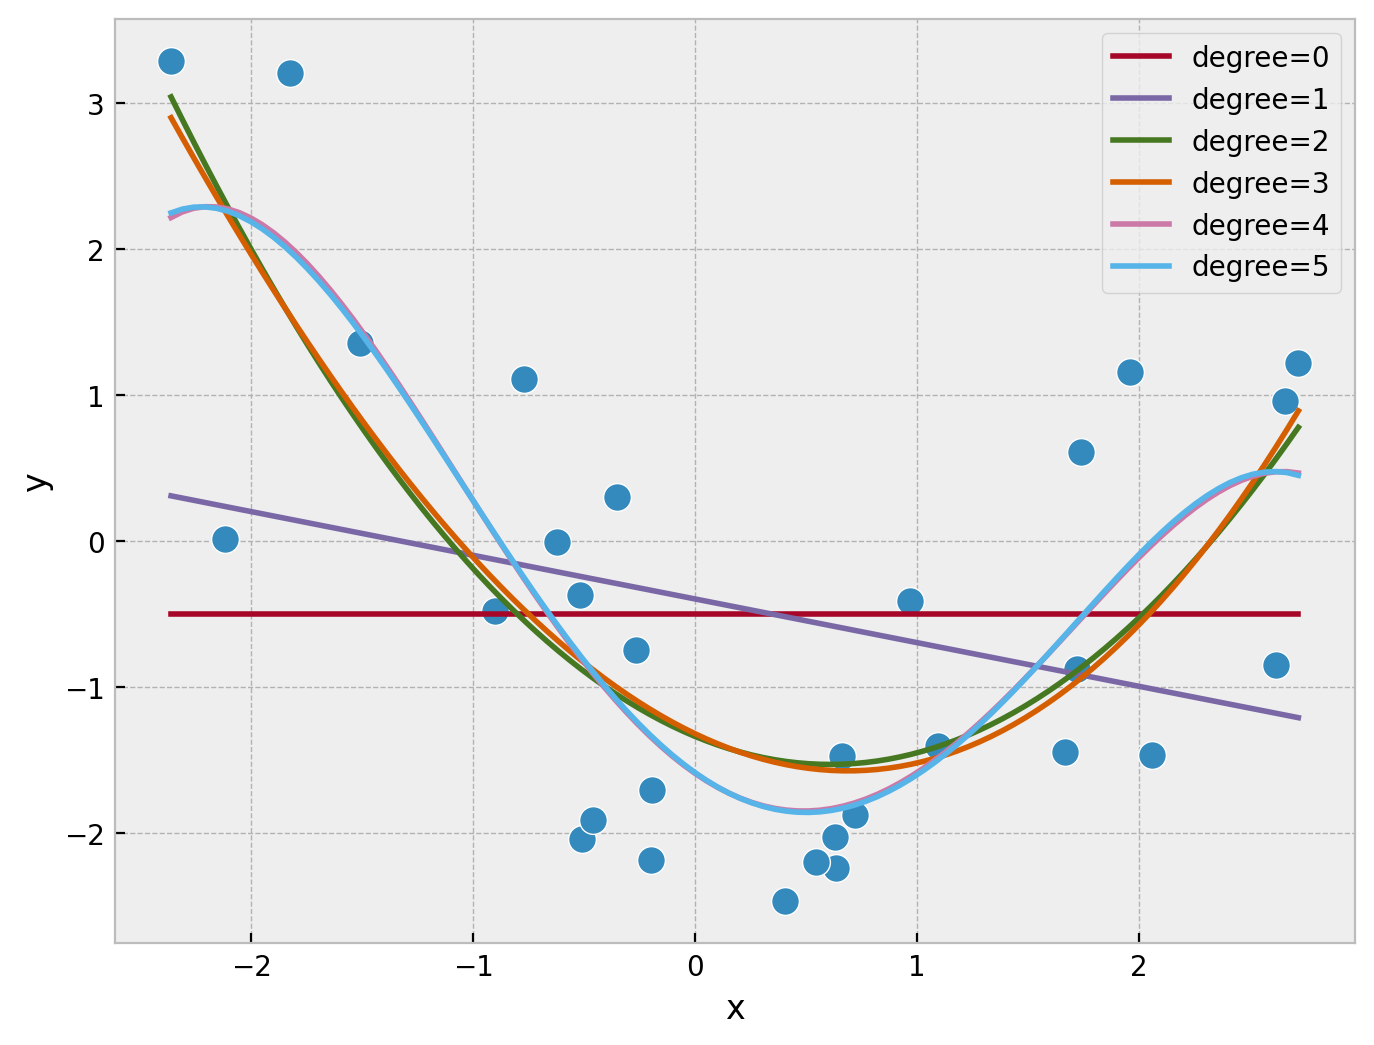

In [6]:
plt.plot(x, y, 'o')

xrange = np.linspace(x.min(), x.max(), 100)

for model in models:
    lin2poly = PolynomialFeatures(degree=model.rank_)
    Xrange = lin2poly.fit_transform(xrange.reshape([-1,1]))
    plt.plot(xrange, model.predict(Xrange), 
             label=f'degree={model.rank_}')
    
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

# Exercise

Compute mean squared error ($MSE$) and $R^2$ for each model.

In [ ]:
# MSE and R^2
mse = []
R2 = []
for model, Xpoly in zip(models, Xpolys):
    residuals = ...
    
    mse.append(...)
    R2.append(...)

degrees = range(6)
plt.subplot(1, 2, 1)
plt.bar(degrees, mse)
plt.xlabel('degree')
plt.ylabel('MSE')
plt.subplot(1, 2, 2)
plt.bar(degrees, R2)
plt.xlabel('degree')
plt.ylabel(r'$R^2$')
plt.tight_layout();

# Exercise Key

Compute mean squared error ($MSE$) and $R^2$ for each model.

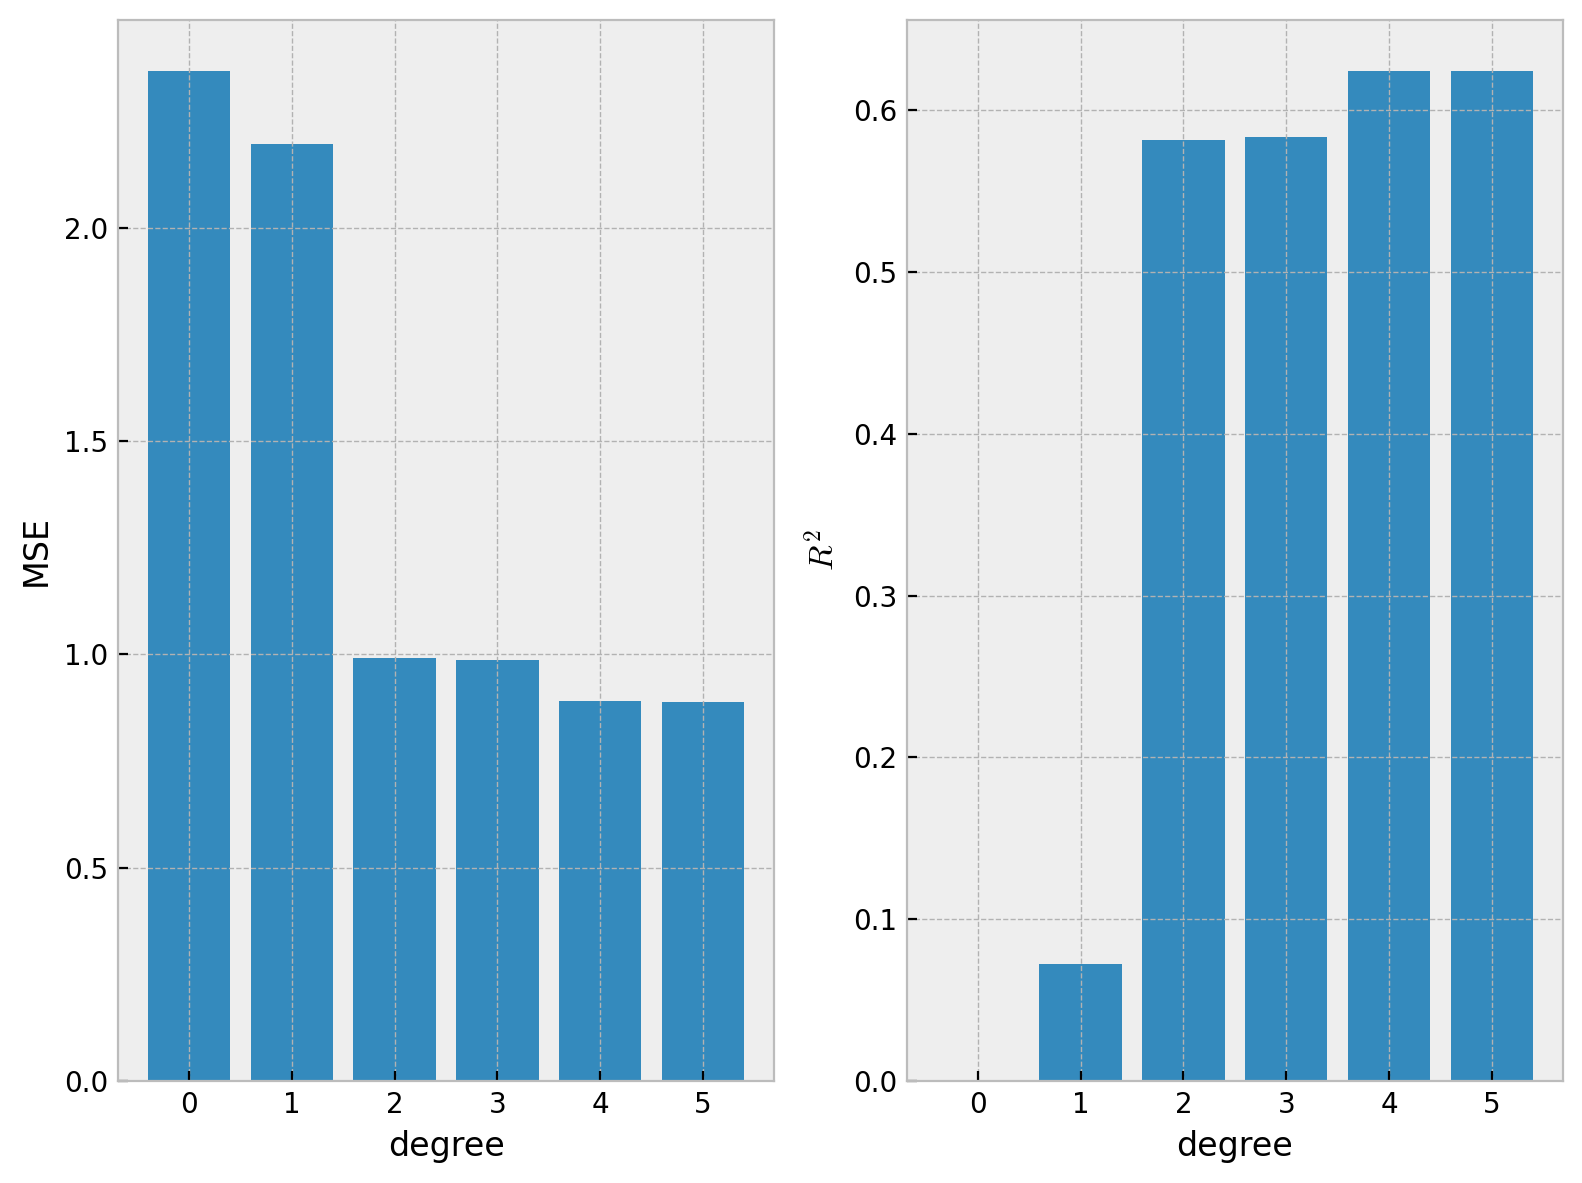

In [11]:
# MSE and R^2
mse = []
R2 = []
for model, Xpoly in zip(models, Xpolys):
    residuals = y - model.predict(Xpoly)
    
    mse.append(np.mean(residuals**2))
    R2.append(model.score(Xpoly, y))

degrees = range(6)
plt.subplot(1, 2, 1)
plt.bar(degrees, mse)
plt.xlabel('degree')
plt.ylabel('MSE')
plt.subplot(1, 2, 2)
plt.bar(degrees, R2)
plt.xlabel('degree')
plt.ylabel(r'$R^2$')
plt.tight_layout();

You collect some new data that you'd like to test your model on.

In [8]:
x_test = np.array([ 2.28661918,  0.48763724,  2.29041217,  1.15518954,  1.35152568,
        0.00794629,  2.73650181,  0.8639412 , -0.45686971,  0.63835928,
       -2.88484081, -1.1905511 ,  0.96104122, -1.25953436,  0.70809257,
       -0.42738779, -2.18715561, -1.21030604,  0.41978946,  0.54523657])
y_test = np.array([ 2.80956706, -1.3438025 ,  0.09435006,  0.08933829, -1.79290739,
       -1.20542675,  3.69919231, -2.2725569 , -0.72032099, -1.30865004,
        9.58357284, -0.49143777, -1.73920281,  2.17234705, -2.90126534,
       -1.53958642,  4.53565175,  2.52441049, -1.57127151, -1.84049182])

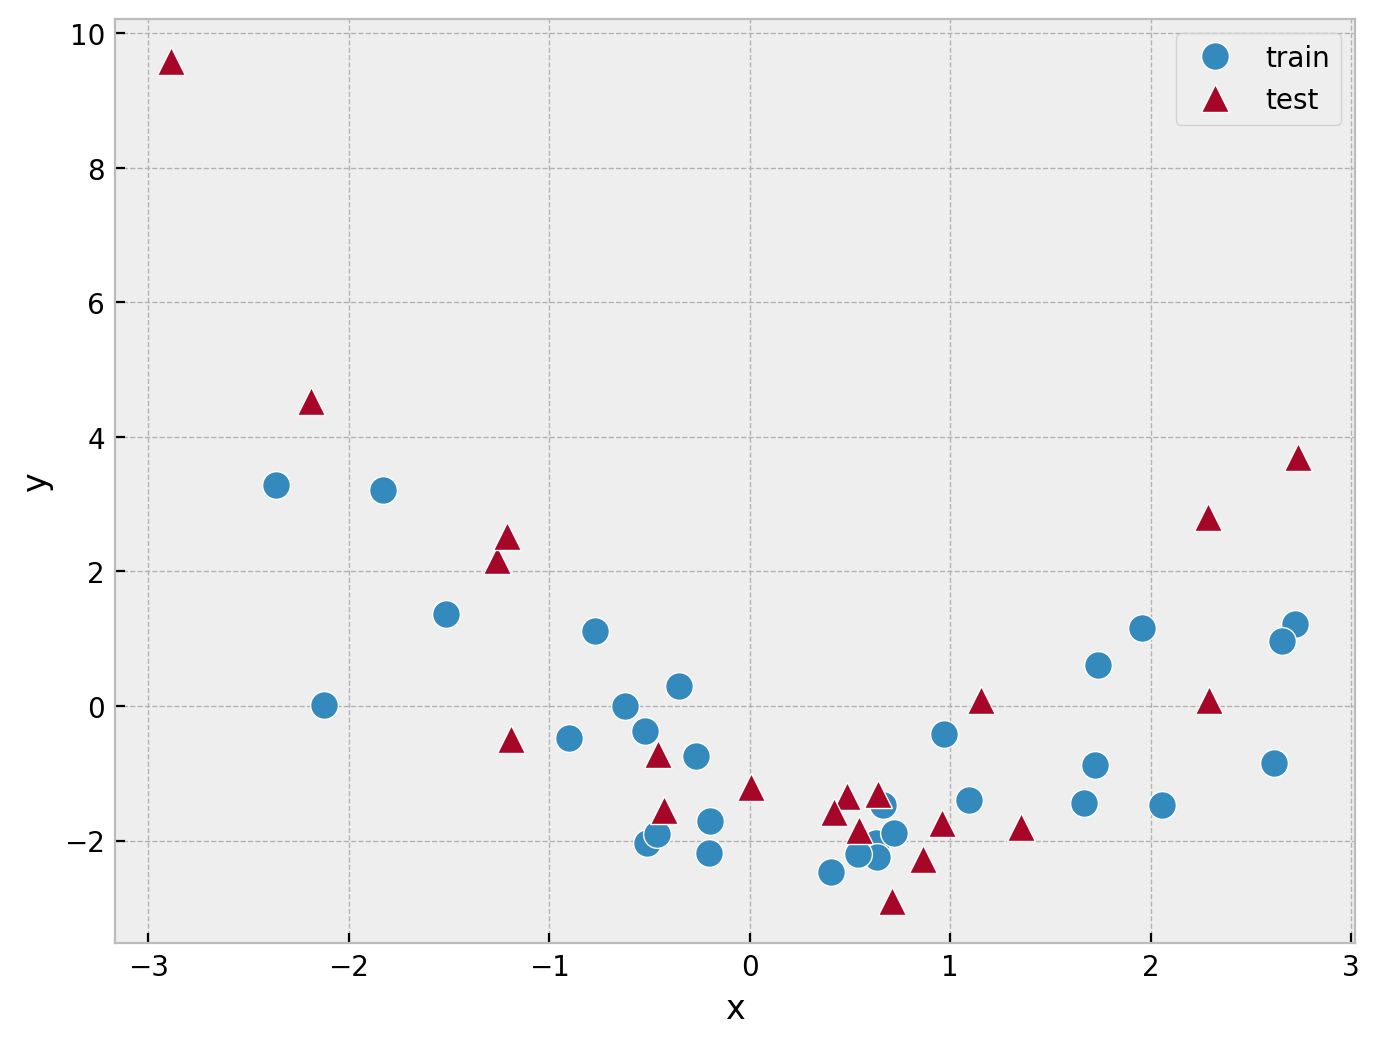

In [9]:
plt.plot(x, y, 'o', label='train')
plt.plot(x_test, y_test, '^', label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

Transform the `x_test` data for each polynomial model.

In [10]:
Xpolys_test = []
for model in models:
    lin2poly = PolynomialFeatures(degree=model.rank_)
    Xpoly = lin2poly.fit_transform(x_test.reshape([-1,1]))
    Xpolys_test.append(Xpoly)

Compute mean squared error ($MSE$) and $R^2$ for each model on the new data which the model's were NOT trained on.

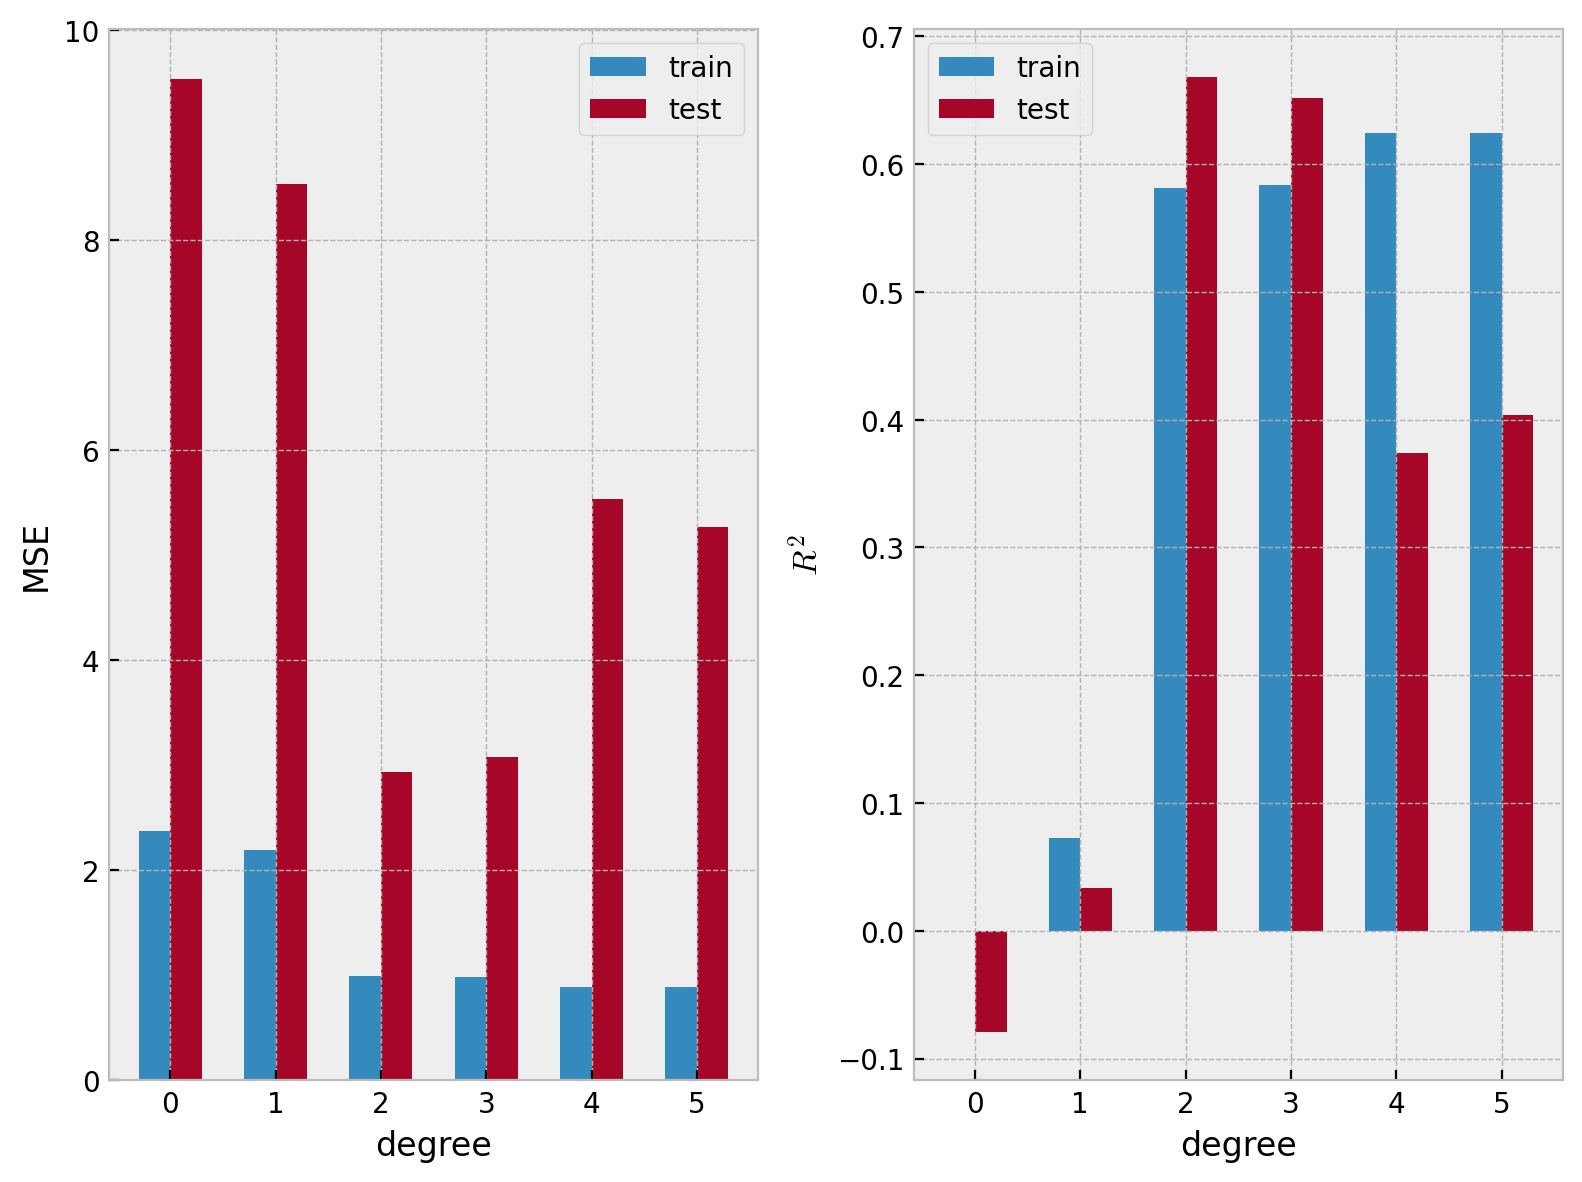

In [13]:
# test MSE and R^2
test_mse = []
test_R2 = []
for model, Xpoly_test in zip(models, Xpolys_test):
    residuals = y_test - model.predict(Xpoly_test)
    
    test_mse.append(np.mean(residuals**2))
    test_R2.append(model.score(Xpoly_test, y_test))

degrees = np.arange(6)
plt.subplot(1, 2, 1)
plt.bar(degrees - 0.15, mse, width=0.3, label='train')
plt.bar(degrees + 0.15, test_mse, width=0.3, label='test')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.legend()
plt.subplot(1, 2 ,2)
plt.bar(degrees - 0.15, R2, width=0.3, label='train')
plt.bar(degrees + 0.15, test_R2, width=0.3, label='test')
plt.xlabel('degree')
plt.ylabel(r'$R^2$')
plt.legend()
plt.tight_layout();

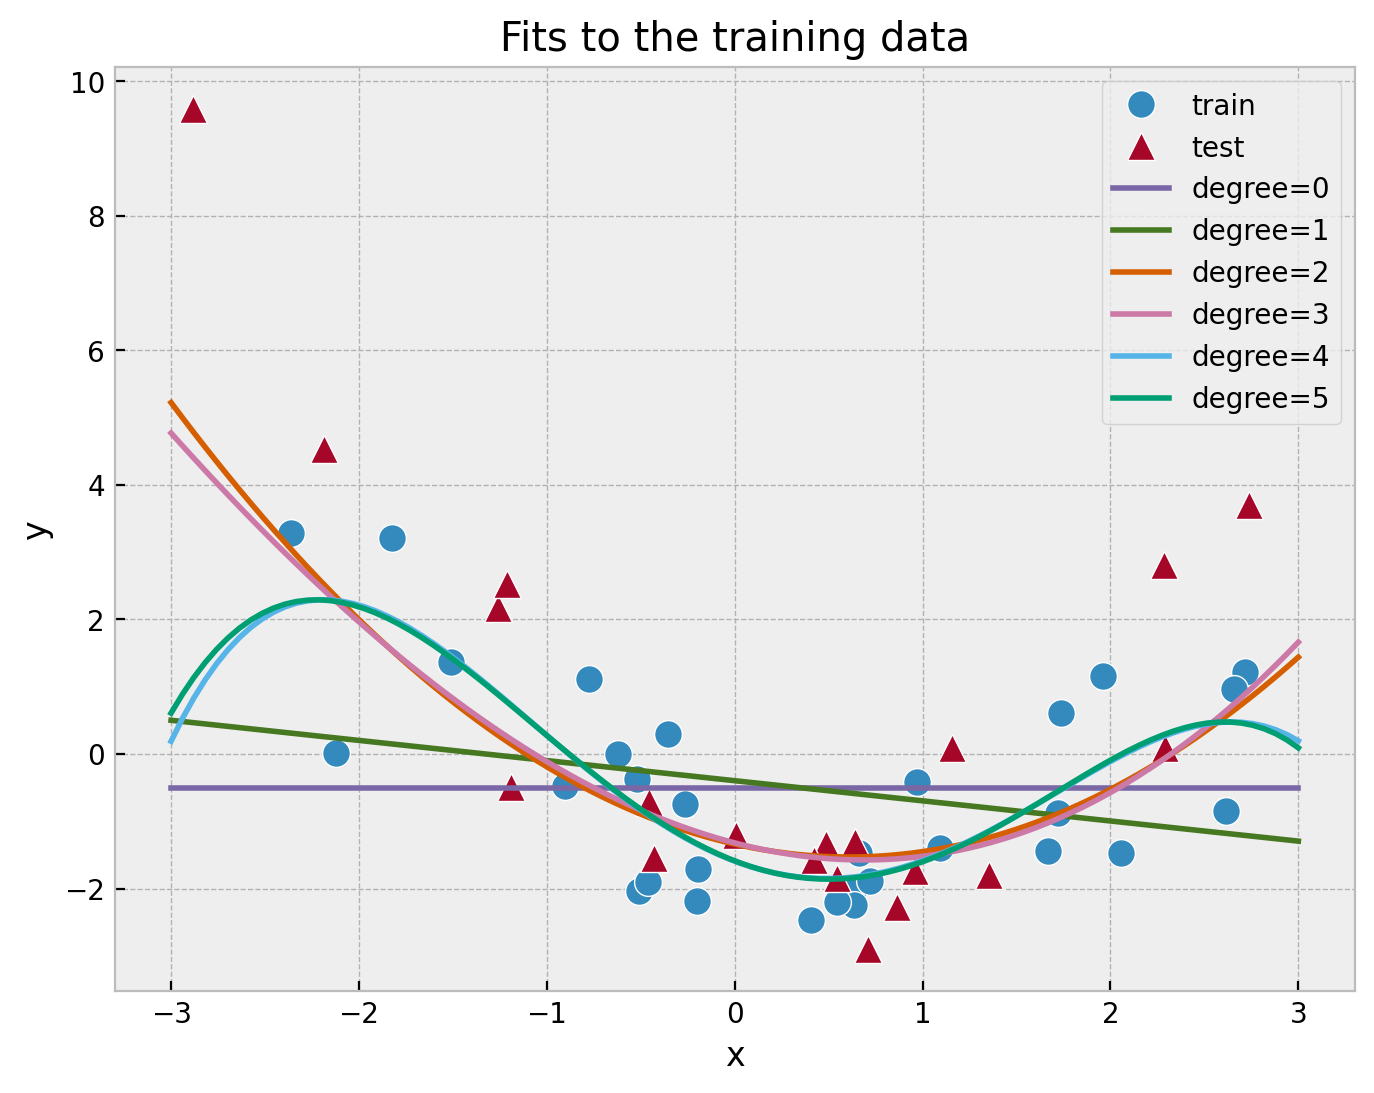

In [14]:
plt.plot(x, y, 'o', label='train')
plt.plot(x_test, y_test, '^', label='test')

xrange = np.linspace(-3, 3, 100)
for model in models:
    lin2poly = PolynomialFeatures(degree=model.rank_)
    Xrange = lin2poly.fit_transform(xrange.reshape([-1,1]))
    plt.plot(xrange, model.predict(Xrange), 
             label=f'degree={model.rank_}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fits to the training data')
plt.legend();

Train/Test split

In [15]:
# put all the data together
X_all = np.hstack([x, x_test]).reshape([-1, 1])
y_all = np.hstack([y, y_test])

X_all.shape, y_all.shape

((50, 1), (50,))

In [16]:
from sklearn.model_selection import train_test_split

# split data into train and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(X_all, y_all, shuffle=True, test_size=0.2, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 1), (10, 1), (40,), (10,))

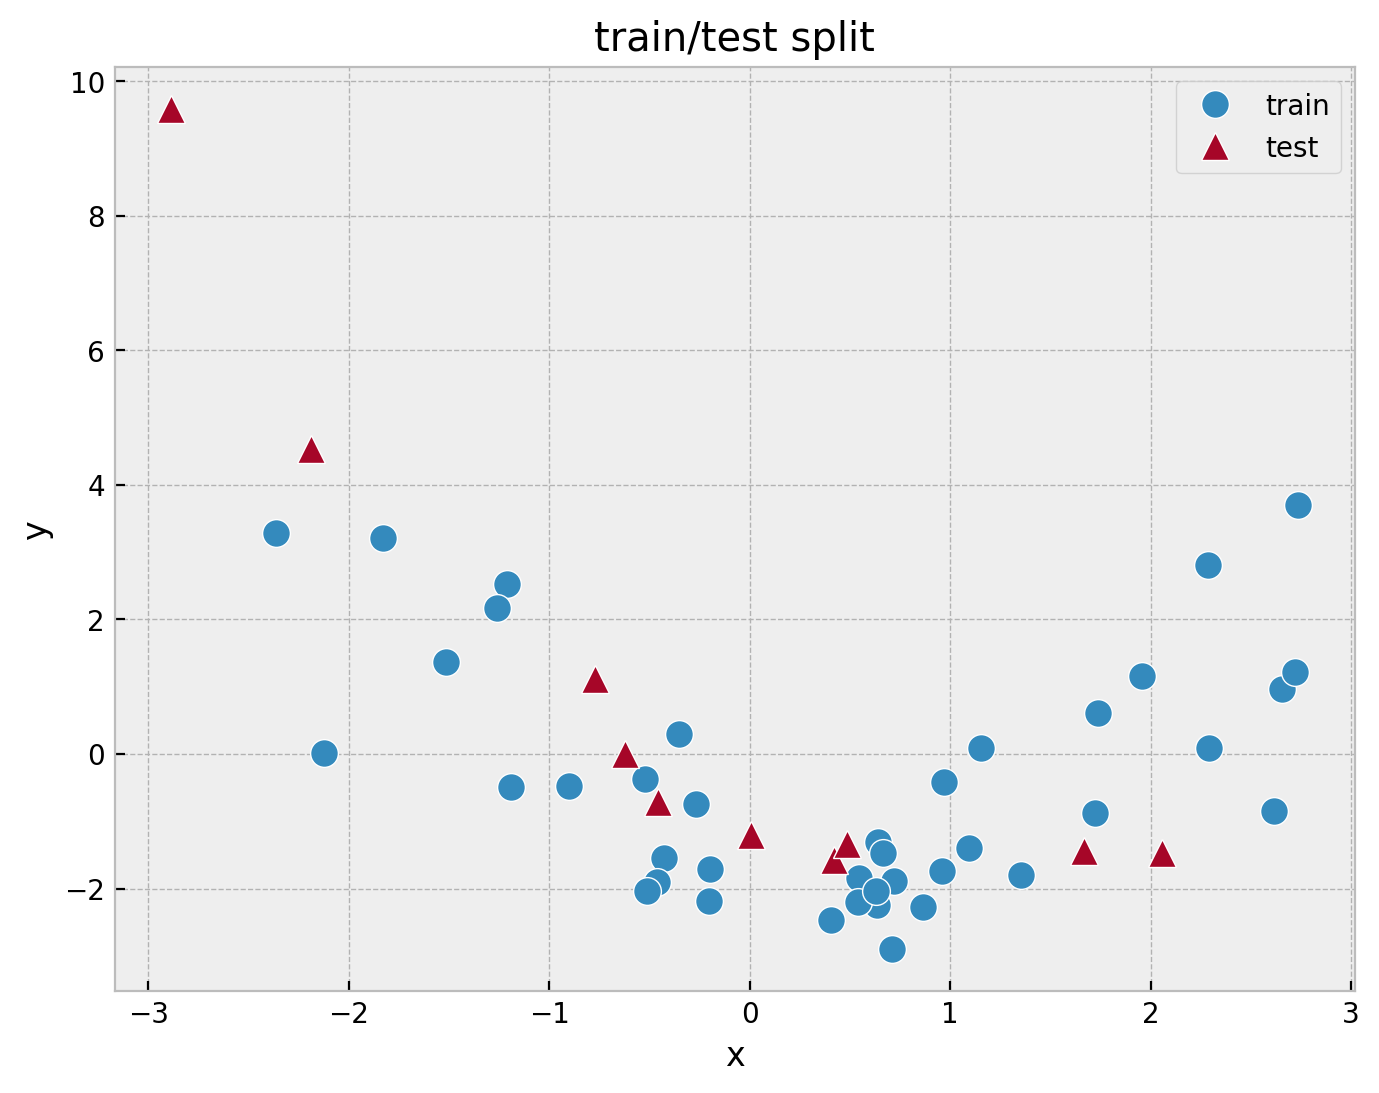

In [14]:
plt.plot(X_train, y_train, 'o', label='train')
plt.plot(X_test, y_test, '^', label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.title('train/test split')
plt.legend();

Train each model on the training set and evaluate it's error on the test set.

In [17]:
test_mse = []
for degree in range(6):
    lin2poly = PolynomialFeatures(degree=degree)
    Xpoly_train = lin2poly.fit_transform(X_train)
    Xpoly_test = lin2poly.fit_transform(X_test)
    
    model = LinearRegression()
    model.fit(Xpoly_train, y_train)
    
    test_SE = (y_test - model.predict(Xpoly_test))**2
    test_mse.append(test_SE.mean())

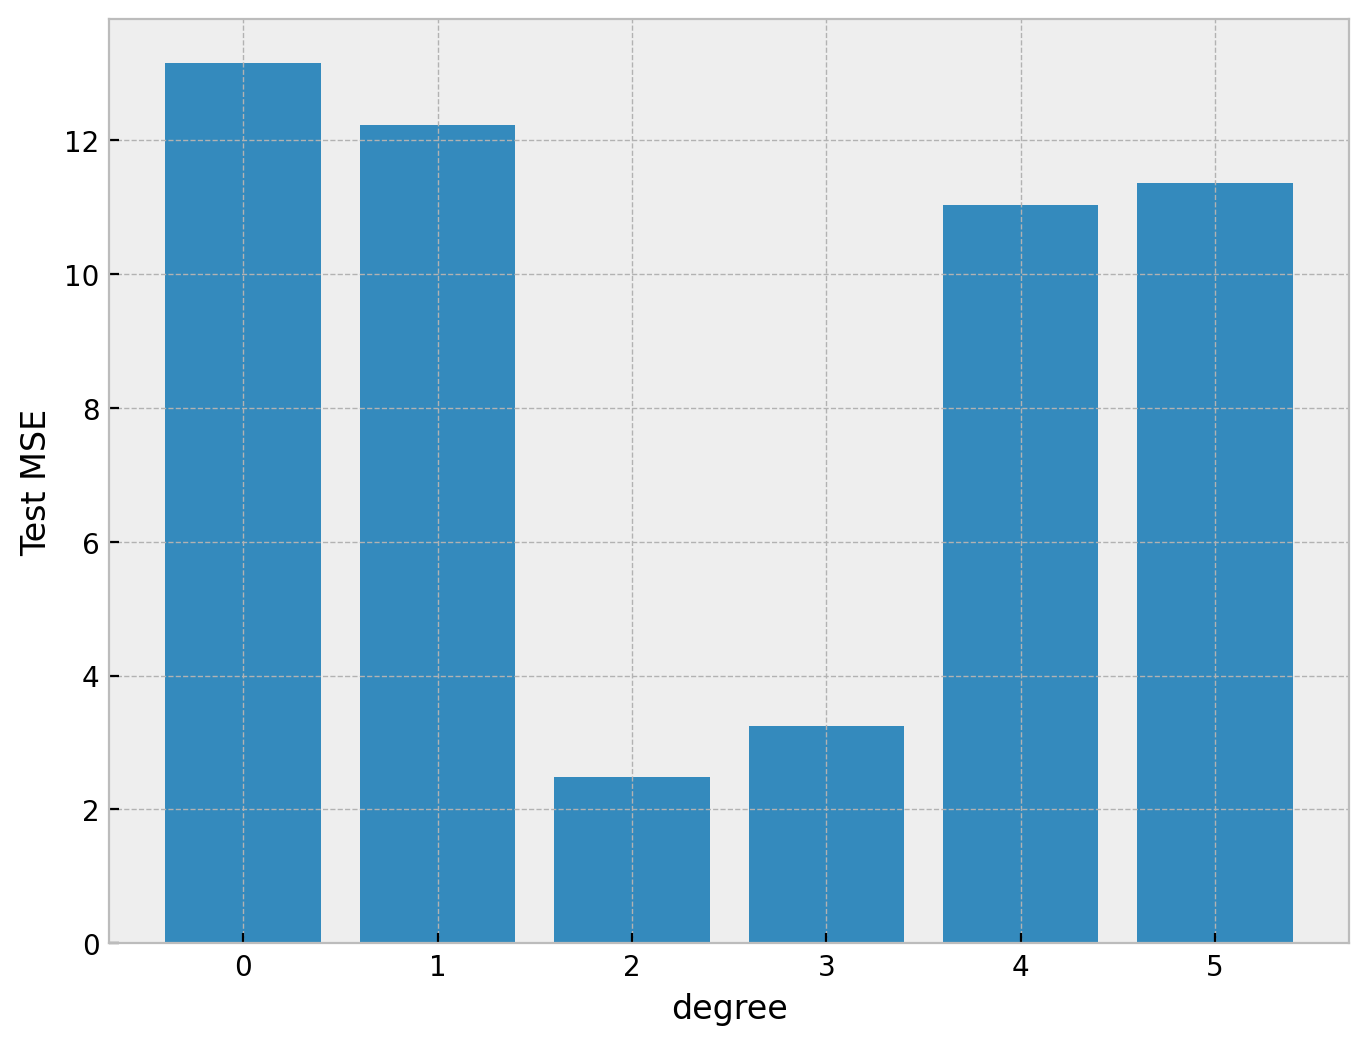

In [18]:
degrees = range(6)
plt.bar(degrees, test_mse)
plt.xlabel('degree')
plt.ylabel('Test MSE');

A different random train/test split...

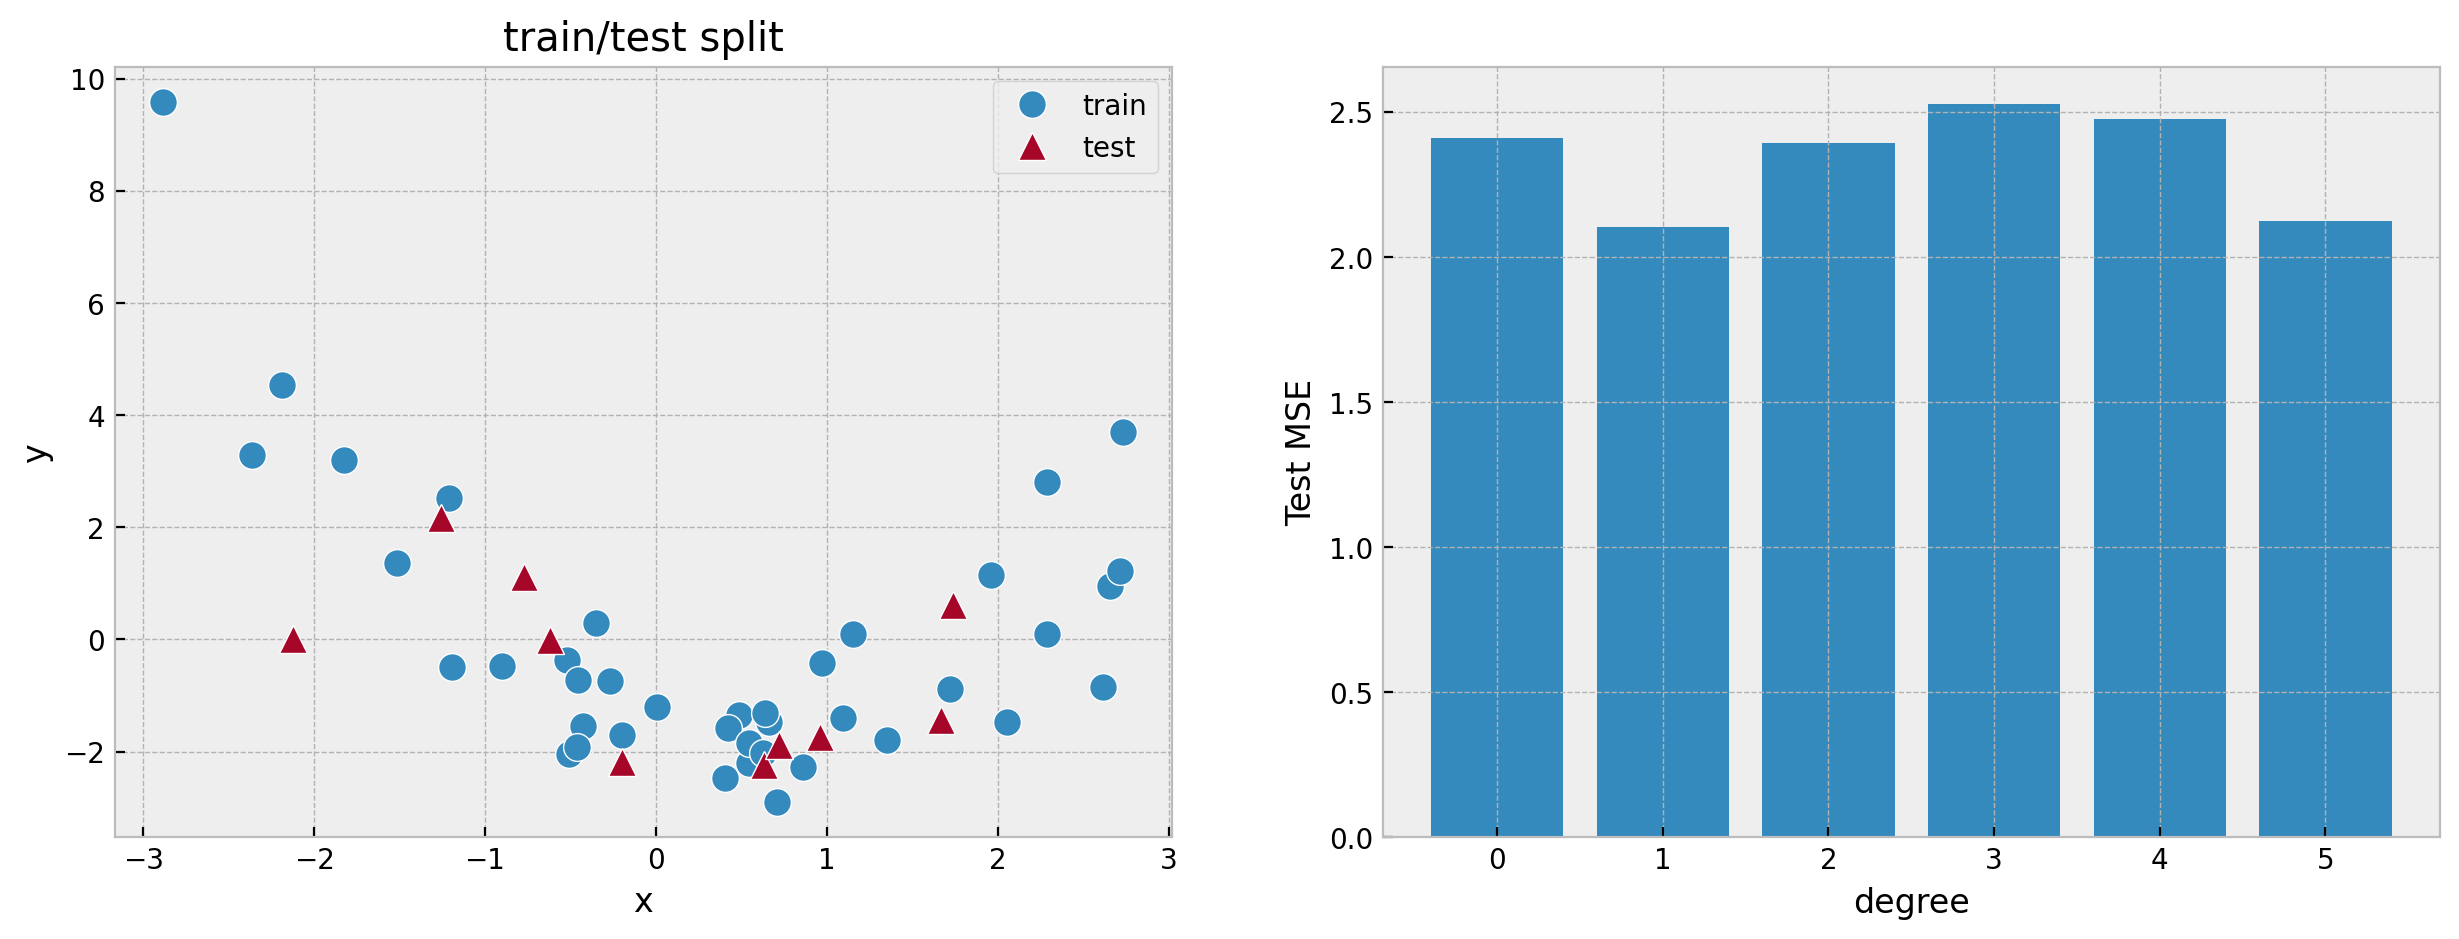

In [19]:
# another train/test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    shuffle=True, test_size=0.2, 
                                                    random_state=5)
test_mse = []
for degree in range(6):
    lin2poly = PolynomialFeatures(degree=degree)
    Xpoly_train = lin2poly.fit_transform(X_train.reshape([-1,1]))
    Xpoly_test = lin2poly.fit_transform(X_test.reshape([-1,1]))
    
    model = LinearRegression()
    model.fit(Xpoly_train, y_train)
    
    test_SE = (y_test - model.predict(Xpoly_test))**2
    test_mse.append(test_SE.mean())

plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(X_train, y_train, 'o', label='train')
plt.plot(X_test, y_test, '^', label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.title('train/test split')
plt.legend()
plt.subplot(122)
degrees = range(6)
plt.bar(degrees, test_mse)
plt.xlabel('degree')
plt.ylabel('Test MSE');

How you split the data can matter!

### Learning goals - *Train/Test split*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will go through an example illustrating how a model's error differs between training and testing data sets.</div> | `train_test_split` |

# Cross Validation

- Train/Test split
- *Cross validation*

### Learning goals - *Cross validation*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to perform K-fold cross validation.</div> | `KFold` |

In [21]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=0)

for train_indices, test_indices in kf.split(X_all):
    X_train = X_all[train_indices]
    y_train = y_all[train_indices]
    X_test = X_all[test_indices]
    y_test = y_all[test_indices]
    
    # do something with the train/test split for this fold...

In [22]:
for i, (train_indices, test_indices) in enumerate(kf.split(X_all)):
    X_train = X_all[train_indices]
    y_train = y_all[train_indices]
    X_test = X_all[test_indices]
    y_test = y_all[test_indices]
    
    print(i)
    
    # do something with the train/test split for this fold...

0
1
2
3
4


Use 5-fold cross validation to evaluate how variable each of the models to different partitioning of the data into train/test sets.

In [30]:
cv_mse = np.zeros([6, 5])  # models x folds

kf = KFold(n_splits=5, shuffle=True, random_state=0)

for i, (train_indices, test_indices) in enumerate(kf.split(X_all)):
    X_train = X_all[train_indices]
    y_train = y_all[train_indices]
    X_test = X_all[test_indices]
    y_test = y_all[test_indices]
    
    # evaluate test error for all models given the train/test split for this fold
    for degree in range(6):
        lin2poly = PolynomialFeatures(degree=degree)
        Xpoly_train = lin2poly.fit_transform(X_train)
        Xpoly_test = lin2poly.fit_transform(X_test)

        model = LinearRegression()
        model.fit(Xpoly_train, y_train)

        test_SE = (y_test - model.predict(Xpoly_test))**2
        cv_mse[degree,i] = test_SE.mean()

In [31]:
cv_mse

array([[ 2.40496609,  2.3275215 ,  2.42852249, 12.81714549,  6.84887275],
       [ 1.89316677,  2.82614822,  3.24713012, 11.20378155,  6.71826928],
       [ 0.64218023,  0.53581492,  1.09055546,  2.19070333,  2.71312084],
       [ 0.65857018,  0.50482427,  1.13822825,  3.80246197,  3.30867054],
       [ 0.65951342,  0.55801706,  1.32240721,  7.33116245,  3.44648608],
       [ 0.98748575,  0.83321843,  1.03377595, 14.65525916,  3.48930099]])

In [32]:
# average test error across folds
cv_mse.mean(axis=1)

array([5.36540566, 5.17769919, 1.43447496, 1.88255104, 2.66351725,
       4.19980805])

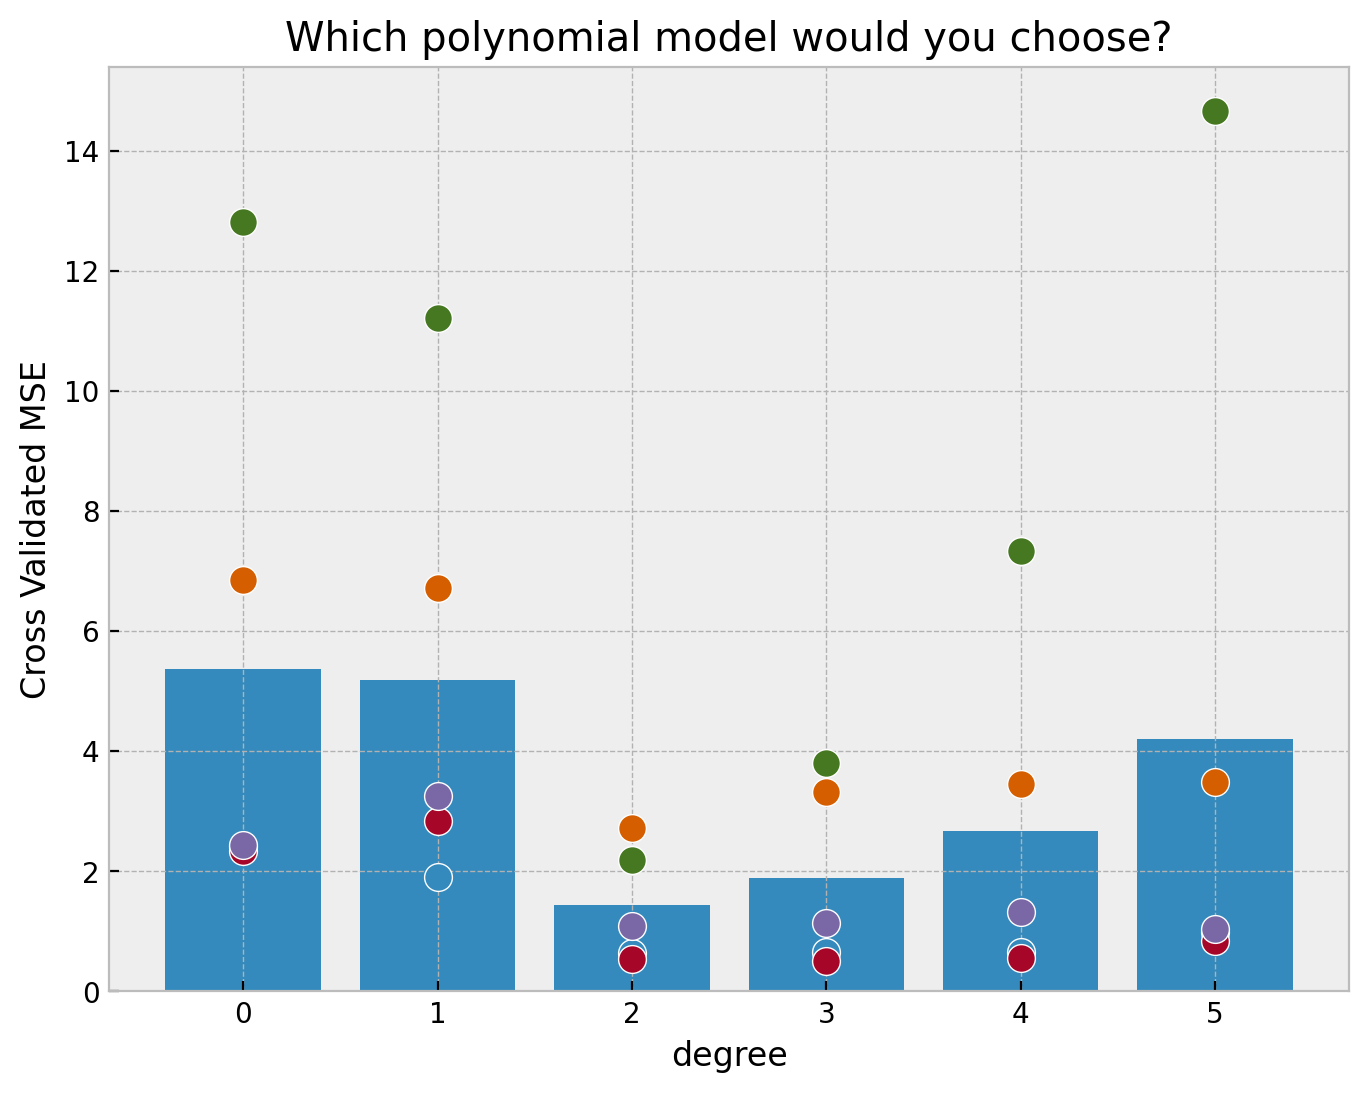

In [37]:
degrees = range(6)
plt.bar(degrees, cv_mse.mean(axis=1))
plt.plot(degrees, cv_mse, 'o')
plt.xlabel('degree')
plt.ylabel('Cross Validated MSE')
plt.title('Which polynomial model would you choose?');

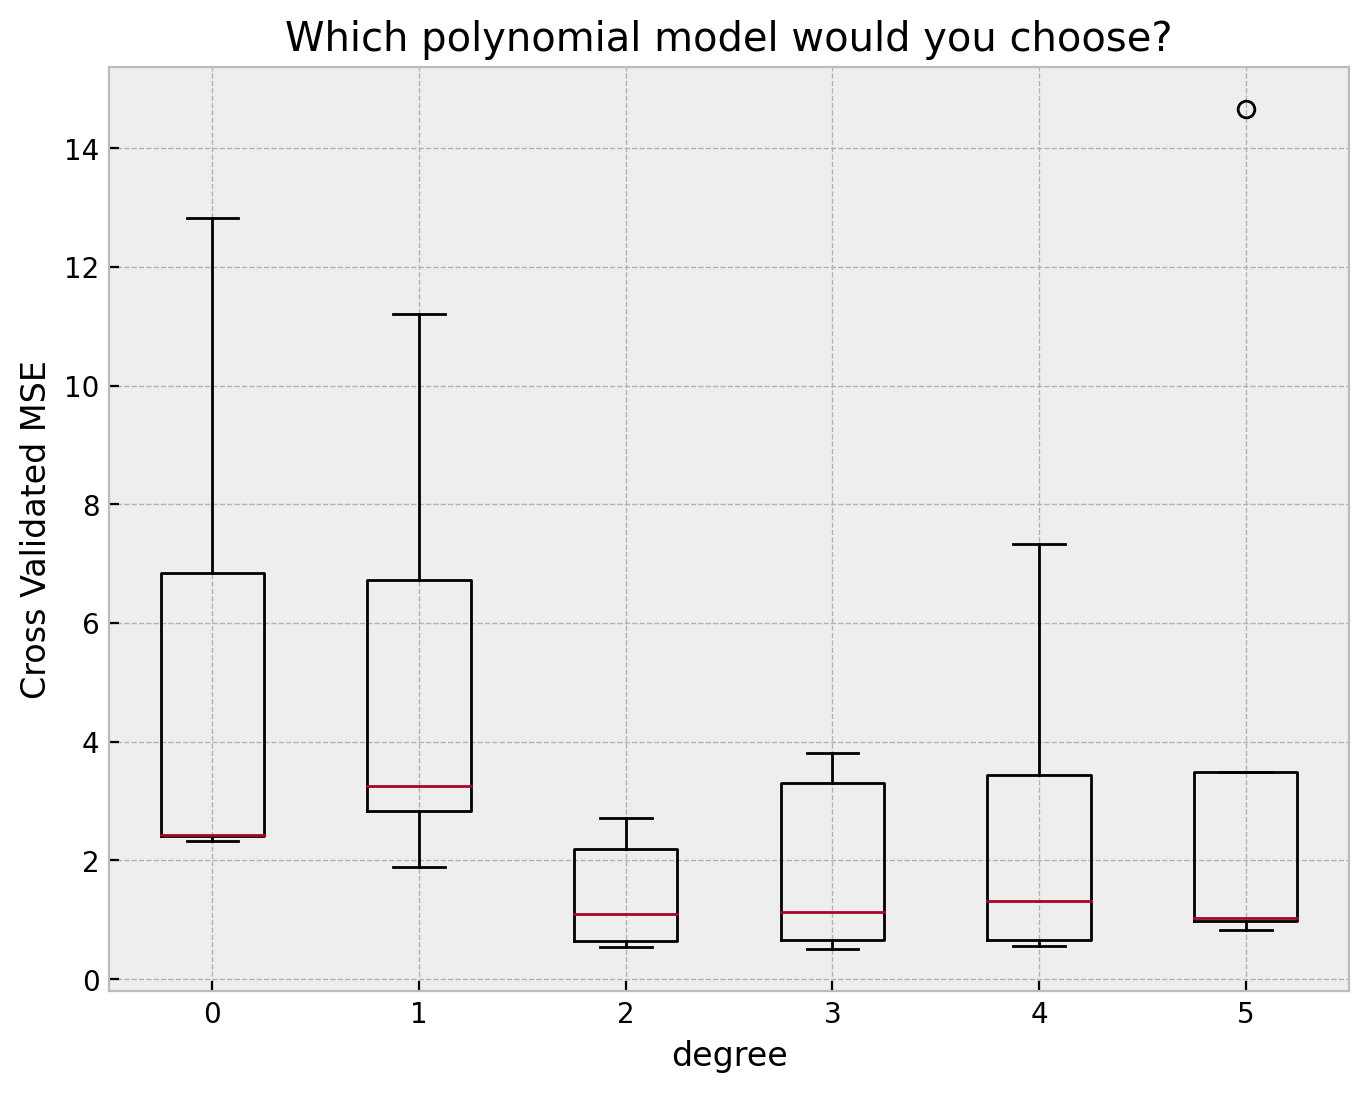

In [39]:
degrees = range(6)
plt.boxplot(cv_mse.T, positions=degrees)
plt.xlabel('degree')
plt.ylabel('Cross Validated MSE')
plt.title('Which polynomial model would you choose?');

K-fold cross validation wrapped up nice and neat for you in `cross_validate`.

In [40]:
from sklearn.model_selection import cross_validate

model = LinearRegression()

cv_results = cross_validate(model, Xpolys[2], y, cv=5)

cv_results['test_score']

array([-0.07216932,  0.45052373,  0.72582122,  0.4928427 , -0.887673  ])

In [43]:
mse = np.zeros([6, 5])  # models x folds
for degree in range(6):
    cv_results = cross_validate(model, Xpolys[degree], y, cv=5, 
                                scoring='neg_mean_squared_error')
    mse[degree] = -cv_results['test_score']
mse

array([[1.7008328 , 1.98568458, 3.61563992, 3.5692544 , 1.28491791],
       [1.28284269, 3.5346489 , 3.16225996, 3.09799666, 1.32337339],
       [1.44814268, 1.07972171, 0.96946143, 1.80643277, 1.64145005],
       [1.63728044, 1.06407328, 1.55772679, 1.84673919, 1.84603921],
       [1.31244466, 0.91752419, 3.03158405, 1.76573323, 2.07808599],
       [1.34113334, 0.91754211, 7.02868363, 1.89204488, 2.41758678]])

In [44]:
train_mse = np.zeros([6, 5])  # models x folds
test_mse = np.zeros([6, 5])  # models x folds
for degree in range(6):
    cv_results = cross_validate(model, Xpolys[degree], y, cv=5, 
                                scoring='neg_mean_squared_error',
                                return_train_score=True)
    train_mse[degree] = -cv_results['train_score']
    test_mse[degree] = -cv_results['test_score']
train_mse, test_mse

(array([[2.55278128, 2.46509415, 2.06055949, 2.06853633, 2.66001943],
        [2.44285387, 1.96326504, 1.97779646, 2.01027527, 2.43022614],
        [0.92362322, 1.01240988, 1.00645178, 0.8259961 , 1.01165006],
        [0.91539203, 1.00618402, 0.93660505, 0.82452062, 0.99498211],
        [0.84061777, 0.93452981, 0.7452838 , 0.75707186, 0.8128304 ],
        [0.83869919, 0.93452293, 0.65290059, 0.75366823, 0.78376128]]),
 array([[1.7008328 , 1.98568458, 3.61563992, 3.5692544 , 1.28491791],
        [1.28284269, 3.5346489 , 3.16225996, 3.09799666, 1.32337339],
        [1.44814268, 1.07972171, 0.96946143, 1.80643277, 1.64145005],
        [1.63728044, 1.06407328, 1.55772679, 1.84673919, 1.84603921],
        [1.31244466, 0.91752419, 3.03158405, 1.76573323, 2.07808599],
        [1.34113334, 0.91754211, 7.02868363, 1.89204488, 2.41758678]]))

### Learning goals - *Cross validation*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to perform K-fold cross validation.</div> | `KFold` |